ÂâçÊ∫ñÂÇô

In [1]:
#numpy, matplotlib, pandas„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import re
import unicodedata
import seaborn as sns
import itertools

#Êó•‰ªò„Éá„Éº„Çø„ÅÆÂ§âÊõ¥„ÅÆ„Åü„ÇÅ„Ç§„É≥„Éù„Éº„Éà
import datetime as dt

# Ê¨†ÊêçÂÄ§Ë£úÂÆå(MICE)„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# RFE„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

#lightGBM„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import lightgbm as lgb

#Ë®ìÁ∑¥„Éá„Éº„Çø„Å®„ÉÜ„Çπ„Éà„Éá„Éº„ÇøÂàÜÂâ≤„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#Ê®ôÊ∫ñÂåñ„ÅÆ„Åü„ÇÅ„Ç§„É≥„Éù„Éº„Éà
from sklearn.preprocessing import StandardScaler

#„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞„ÅÆ„Åü„ÇÅ„Ç§„É≥„Éù„Éº„Éà
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Á≤æÂ∫¶Ê§úË®º„ÅÆ„Åü„ÇÅ„Ç§„É≥„Éù„Éº„Éà
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

#„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from sklearn.model_selection import GridSearchCV

#ÁâπÂæ¥ÈáèÈÅ∏Êäû„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

import shap

#„É≠„Ç∏„Çπ„ÉÜ„Ç£„ÉÉ„ÇØÂõûÂ∏∞„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

#SVM„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from sklearn import svm

#Ê±∫ÂÆöÊú®„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from sklearn.ensemble import RandomForestClassifier

#„Ç¢„ÉÄ„Éñ„Éº„Çπ„Éà„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from sklearn.ensemble import AdaBoostClassifier

#CatBoost„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
from catboost import CatBoostClassifier
from catboost import Pool

# SMOTE„ÅÆ„Åü„ÇÅ„Å´„Ç§„É≥„Éù„Éº„Éà
# from imblearn.over_sampling import SMOTE

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# notebook„ÅÆË®≠ÂÆö

# „Éá„Éº„Çø„Éï„É¨„Éº„É†„ÅÆÊúÄÂ§ßË°®Á§∫Ë°åÊï∞„ÄÅÂàóÊï∞„ÇíÂ∫É„Åí„Çã
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

# Âõ≥„ÅÆ„Çµ„Ç§„Ç∫
plt.rcParams["figure.figsize"]=(8,4)

# matplotlib„ÅÆ„Éï„Ç©„É≥„Éà
font = 'Yu Mincho'

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Meiryo']

In [4]:
#Â≠¶Áøí„Éá„Éº„Çø„ÄÅ„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
train0 = pd.read_csv('dataset/train.csv')
test0 = pd.read_csv('dataset/test.csv')

In [5]:
train0

id   Age    TypeofContact  CityTier DurationOfPitch      Occupation  \
0        0   50Ê≠≥     Self Enquiry         2            900Áßí  Large Business   
1        1   56Ê≠≥  Company Invited         1             14ÂàÜ        Salaried   
2        2   NaN     Self Enquiry         1             10ÂàÜ  Large Business   
3        3  ‰∏âÂçÅ‰∏ÉÊ≠≥     Self Enquiry         2           1080Áßí  Small Business   
4        4   48Ê≠≥  Company Invited         3           1020Áßí  Small Business   
...    ...   ...              ...       ...             ...             ...   
3484  3484   40Ê≠≥     Self Enquiry         2           1560Áßí        Salaried   
3485  3485   40‰ª£     Self Enquiry         1              9ÂàÜ  Large Business   
3486  3486   31Ê≠≥     Self Enquiry         1            840Áßí  Small Business   
3487  3487   56Ê≠≥  Company Invited         2            900Áßí        Salaried   
3488  3488   42Ê≠≥     Self Enquiry         1              9ÂàÜ  Small Business   

      Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0       male                     1.0                4.0          Basic   
1       Male                     1.0                4.0       Standard   
2     Female                     1.0                3.0          Basic   
3     female                     1.0                3.0       Standard   
4     female                     1.0                3.0          Basic   
...      ...                     ...                ...            ...   
3484    Male                     2.0                3.0          Basic   
3485    Male                     3.0                3.0          Basic   
3486  FEMALE                     3.0                2.0       Standard   
3487    Male                     3.0                6.0           King   
3488    male                     3.0                1.0          Basic   

      PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                       3.0             5         1                       4   
1                       3.0             2         1                       4   
2                       3.0             4         0                       4   
3                       4.0             1         0                       5   
4                       4.0             4         0                       4   
...                     ...           ...       ...                     ...   
3484                    3.0             3         0                       1   
3485                    5.0             5         0                       3   
3486                    3.0             5         0                       4   
3487                    3.0             7         1                       4   
3488                    3.0             3         0                       1   

         Designation MonthlyIncome     customer_info  ProdTaken  
0          Executive      253905.0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó          1  
1     Senior Manager      404475.0     Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó          0  
2          Executive      278145.0  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó          1  
3     Senior Manager      326805.0     Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõÁÑ°„Åó          0  
4          Executive      258435.0         Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºèÁÑ°Â≠ê          1  
...              ...           ...               ...        ...  
3484       Executive      258900.0   Èõ¢Â©öÊ∏à„Åø ‰πóÁî®ËªäÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó          1  
3485       Executive      260415.0     ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ2‰∫∫          0  
3486  Senior Manager      317340.0      Áã¨Ë∫´ÔºèËªäÊâÄÊåÅÔºè„Åì„Å©„ÇÇ1‰∫∫          0  
3487              VP      527910.0  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ„ÄÅÂ≠ê‰æõ2‰∫∫          1  
3488       Executive      278190.0    ÁµêÂ©öÊ∏à„Åø,ËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫          0  

[3489 rows x 18 columns]

In [6]:
test0

id  Age    TypeofContact  CityTier DurationOfPitch      Occupation  \
0     3489  ÔºîÔºòÊ≠≥     Self Enquiry         2             13ÂàÜ  Small Business   
1     3490  30‰ª£     Self Enquiry         2             12ÂàÜ  Small Business   
2     3491  25Ê≠≥     Self Enquiry         1            540Áßí        Salaried   
3     3492  21Ê≠≥  Company Invited         2            420Áßí        Salaried   
4     3493  41Ê≠≥  Company Invited         1              7ÂàÜ        Salaried   
...    ...  ...              ...       ...             ...             ...   
3484  6973  41Ê≠≥  Company Invited         1             14ÂàÜ  Small Business   
3485  6974  44Ê≠≥  Company Invited         1             35ÂàÜ        Salaried   
3486  6975  24Ê≠≥     Self Enquiry         2             21ÂàÜ  Small Business   
3487  6976  25Ê≠≥     Self Enquiry         1              9ÂàÜ  Small Business   
3488  6977  44Êâç     Self Enquiry         1            480Áßí  Small Business   

      Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0       Male                     1.0                4.0   Super De|uxe   
1     Ôº¶ÔΩÖÔΩçÔΩÅÔΩåÔΩÖ                     1.0                4.0       Standard   
2     Female                     1.0                4.0          Basic   
3       Male                     1.0                4.0          Basic   
4       MALE                     1.0                4.0          Basic   
...      ...                     ...                ...            ...   
3484  Female                     1.0                3.0          Basic   
3485    Male                     3.0                5.0         Deluxe   
3486    male                     2.0                3.0          basic   
3487    MALE                     2.0                3.0          Basic   
3488  female                     4.0                4.0         Deluxe   

      PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                       3.0             7         0                       3   
1                       3.0             4         1                       3   
2                       3.0             1         0                       3   
3                       4.0             1         0                       3   
4                       3.0             1         0                       4   
...                     ...           ...       ...                     ...   
3484                    3.0             2         0                       4   
3485                    3.0             3         0                       3   
3486                    3.0             2         0                       3   
3487                    3.0             2         0                       3   
3488                    3.0             5         0                       1   

         Designation MonthlyIncome     customer_info  
0                AVP      496950.0     ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó  
1     Senior Manager      ÊúàÂèé30.0‰∏áÂÜÜ    ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó  
2          Executive      ÊúàÂèé26.0‰∏áÂÜÜ  Èõ¢Â©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ„ÄÅÂ≠ê‰æõ„Å™„Åó  
3     Senior Manager      259875.0   Èõ¢Â©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊâÄÊúâ„ÄÅÂ≠ê‰æõ„Å™„Åó  
4          Executive      268830.0       Áã¨Ë∫´/ËªäÊâÄÊåÅÔºèÂ≠ê‰æõ„Å™„Åó  
...              ...           ...               ...  
3484       Executive      261840.0     ÁµêÂ©öÊ∏à„Åø/Ëªä„Å™„ÅóÔºèÂ≠ê‰æõÁÑ°„Åó  
3485         Manager      349770.0  ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂÆ∂Áî®Ëªä„ÅÇ„Çä„ÄÅÂ≠ê‰æõ1‰∫∫  
3486       Executive      ÊúàÂèé27.0‰∏áÂÜÜ      Áã¨Ë∫´„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó  
3487       Executive      272430.0   ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅ„Åì„Å©„ÇÇ1‰∫∫  
3488         Manager      411795.0       Êú™Â©ö„ÄÄËªä„Å™„Åó„ÄÄÂ≠ê‰æõ3‰∫∫  

[3489 rows x 17 columns]

In [7]:
# ‰∏çË¶Å„Å™Â§âÊï∞„ÅÆÂâäÈô§

# Â§âÊï∞Âêç„Å®ÂàóÁï™Âè∑„ÅÆÂØæÂøú„ÇíË°®Á§∫
col = pd.DataFrame(train0.columns.values).T

# drop„ÅÆÂÆüË°å,‰∫ãÊïÖÁéá„Å´Èñ¢‰øÇ„Å™„ÅÑ„Éá„Éº„Çø„ÅØ‰∫àÊ∏¨„Å´Âà©Áî®„Åß„Åç„Å™„ÅÑ„ÅÆ„Åßdrop(Âæå„ÄÖ‰ªñ„ÅÆÂ§âÊï∞„Çídrop„Åó„Åü„Åè„Å™„Å£„ÅüÊôÇÊ•Ω„Å™Êßò„Å´ÂàóÁï™Âè∑„Åßdrop„Åô„Çã)
train1 = train0.drop(train0.columns[0],axis=1) 
test1 = test0.drop(test0.columns[0],axis=1)

In [8]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3389 non-null   object 
 1   TypeofContact           3483 non-null   object 
 2   CityTier                3489 non-null   int64  
 3   DurationOfPitch         3368 non-null   object 
 4   Occupation              3489 non-null   object 
 5   Gender                  3489 non-null   object 
 6   NumberOfPersonVisiting  3489 non-null   float64
 7   NumberOfFollowups       3456 non-null   float64
 8   ProductPitched          3489 non-null   object 
 9   PreferredPropertyStar   3489 non-null   float64
 10  NumberOfTrips           3467 non-null   object 
 11  Passport                3489 non-null   int64  
 12  PitchSatisfactionScore  3489 non-null   int64  
 13  Designation             3489 non-null   object 
 14  MonthlyIncome           3433 non-null   

In [9]:
test1.isnull().sum()

Age                        93
TypeofContact              12
CityTier                    0
DurationOfPitch           131
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups          24
ProductPitched              0
PreferredPropertyStar       0
NumberOfTrips              42
Passport                    0
PitchSatisfactionScore      0
Designation                 0
MonthlyIncome              49
customer_info               0
dtype: int64

In [ ]:
['Age', 'DurationOfPitch', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']

In [25]:
train_x = train1.drop(['ProdTaken'], axis=1)
train_y = train1['ProdTaken']
test_x = test1

def preprocessing(train_x, test_x):
    # Age numeric
    def age_missing(input_str):
            if input_str is None or str(input_str) == 'nan':
                input_str = 0
            if '‰ª£' in str(input_str):
                input_str = input_str.replace('‰ª£', '')
            else:
                input_str = 0
            return int(input_str)
    
    def process_age(age):
        kanji_to_num = {'‰∏Ä': 1, '‰∫å': 2, '‰∏â': 3, 'Âõõ': 4, '‰∫î': 5, 'ÂÖ≠': 6, '‰∏É': 7, 'ÂÖ´': 8, '‰πù': 9,'ÂçÅ': 10, 'Áôæ': 100, 'ÂçÉ': 1000, '‰∏á': 10000,'Èõ∂': 0, '„Äá': 0}
        
        def kanji_to_arabic(kanji):
            result = 0
            temp = 0
            for char in kanji:
                value = kanji_to_num.get(char, None)
                if value is not None:
                    if value < 10:
                        if temp == 0:
                            temp = value
                        else:
                            temp = temp * 10 + value
                    elif value >= 10:
                        if temp == 0:
                            temp = 1
                        result += temp * value
                        temp = 0
            return result + temp
        if age is None or str(age) == 'nan' or '‰ª£' in str(age):
            return None
        age = unicodedata.normalize('NFKC', age)
        age = ''.join([c for c in age if c.isdigit() or c in kanji_to_num])
        if age.isdigit():
            return int(age)
        return kanji_to_arabic(age)

    # TypeofContact categorical(dummy)
    def TypeofContact_to_dummy(str):
        if str == 'Self Enquiry':
            return 1
        elif str == 'Company Invited':
            return 0
        
    # CityTier È†ÜÂ∫èÂ∞∫Â∫¶
    
    # DurationOfPitch numeric
    def convert_to_minutes(duration):
        # duration„ÅåfloatÂûã„Åæ„Åü„ÅØNone„Åß„ÅÇ„ÇãÂèØËÉΩÊÄß„Åå„ÅÇ„Çã„Åü„ÇÅ„ÄÅÊñáÂ≠óÂàó„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç
        if pd.isnull(duration):
            return None  # NaN„ÅÆÂ†¥Âêà„ÄÅNone„ÇíËøî„Åô
        duration = str(duration)  # ÊñáÂ≠óÂàó„Å´Â§âÊèõ„Åó„Å¶„Ç®„É©„Éº„ÇíÈò≤„Åê
        if 'ÂàÜ' in duration:
            return float(duration.replace('ÂàÜ', ''))
        elif 'Áßí' in duration:
            return float(duration.replace('Áßí', '')) / 60  # Áßí„ÇíÂàÜ„Å´Â§âÊèõ„Åó„ÄÅÊï¥Êï∞„ÅßËøî„Åô

    # Occupation categorical
    def Occupation_dealing(str):
        if str == 'Large Business':
            return 2
        elif str == 'Small Business':
            return 1
        elif str == 'Salaried':
            return 0
       
    # Gender categorical
    def Gender_dealing(gender):
        # ÊñáÂ≠óÂàó„ÇíÂçäËßí„Å´Â§âÊèõ„Åó„ÄÅÂ§ßÊñáÂ≠ó„Å´Áµ±‰∏Ä
        gender = unicodedata.normalize('NFKC', gender).upper().strip()
        # ‰∏çË¶Å„Å™Á©∫ÁôΩ„ÇíÂâäÈô§
        gender = ''.join(gender.split())

        if 'FEMALE' in gender:
            return 1
        elif 'MALE' in gender:
            return 0
        else:
            return None  # ÊÄßÂà•„ÅåË≠òÂà•„Åß„Åç„Å™„ÅÑÂ†¥Âêà„ÅØNone„ÇíËøî„Åô
        
    # NumberOfPersonVisiting numeric
    
    # NumberOfFollowups numeric
    def NumberOfFollowups_dealing(input_int):
        if input_int >= 100:
            input_int = input_int / 100
        return input_int
    
    # ProductPitched categorical
    # Designation categorical
    def standardize_str(input_str):
        # ÊñáÂ≠óÂàó„ÇíÂçäËßí„Å´Â§âÊèõ„Åó„ÄÅÂ∞èÊñáÂ≠ó„Å´Áµ±‰∏Ä
        input_str = unicodedata.normalize('NFKC', input_str).lower().strip()
        # ‰∏çË¶Å„Å™Á©∫ÁôΩ„ÇÑÁâπÊÆäË®òÂè∑„ÇíÂâäÈô§
        input_str = ''.join(input_str.split())
        input_str = input_str.replace('|', 'l').replace('√ó', 'x').replace('ùò§', 'c').replace('ùñ∫', 'a').replace('ùô≥', 'd')
        # „Åù„ÅÆ‰ªñÁâπÊÆäÊñáÂ≠ó„ÇíÈÄöÂ∏∏„ÅÆËã±Â≠ó„Å´ÁΩÆÊèõ
        input_str = input_str.replace('·óû', 'd').replace('êä°', 'a').replace('ùò≥', 'r').replace('Íì¢', 's').replace('ƒ±', 'i')
        input_str = input_str.replace('Œ≤', 'b').replace('–≤', 'b').replace('—Å', 'c').replace('’ø', 's').replace('œÇ', 'c')
        input_str = input_str.replace('Í≠∞', 'd').replace('Œµ', 'e').replace('Œπ', 'i').replace('Œ±', 'a').replace('’∏', 'n')
        input_str = input_str.replace('—ï', 's').replace('Œº', 'm').replace('–µ', 'e').replace('–∞', 'a').replace('—µ', 'v')
        input_str = input_str.replace('aasic', 'basic')
        return input_str
    
    def ProductPitched_dealing(input_str):
        if input_str == 'basic':
            return 0
        elif input_str == 'standard':
            return 1
        elif input_str == 'deluxe':
            return 2
        elif input_str == 'superdeluxe':
            return 3
        elif input_str == 'king':
            return 4
        
    def Designation_dealing(input_str):
        if input_str == 'manager':
            return 0
        elif input_str == 'seniormanager':
            return 1
        elif input_str == 'avp':
            return 2
        elif input_str == 'vp':
            return 3
        elif input_str == 'executive':
            return 4
    
    # PreferredPropertyStar È†ÜÂ∫èÂ∞∫Â∫¶
    
    # NumberOfTrips numeric
    def NumberOfTrips_dealing(str):
        if pd.isnull(str):
            return None 
        if 'ÂçäÂπ¥„Å´' in str:
            return 2 * int(str.replace('ÂçäÂπ¥„Å´', '').replace('Âõû', ''))
        elif 'Âπ¥„Å´' in str:
            return int(str.replace('Âπ¥„Å´', '').replace('Âõû', ''))
        elif 'ÂõõÂçäÊúü„Å´' in str:
            return 4 * int(str.replace('ÂõõÂçäÊúü„Å´', '').replace('Âõû', ''))
        else :
            return int(str)
        
    # Passport categorical(dummy)
    
    # PitchSatisfactionScore È†ÜÂ∫èÂ∞∫Â∫¶„Å†„Åë„Å©ÈñìÈöîÂ∞∫Â∫¶ÁöÑË¶ÅÁ¥†„ÅÇ„Çä
    
    # MonthlyIncome numeric
    def MonthlyIncome_dealing(input_str):
        if pd.isnull(input_str):
            return None 
        if 'ÊúàÂèé' in input_str:
            return 10000 * float(input_str.replace('ÊúàÂèé', '').replace('‰∏áÂÜÜ', ''))
        elif '‰∏áÂÜÜ' in input_str:
            return 10000 * float(input_str.replace('‰∏áÂÜÜ', ''))
        else:
            return float(input_str)
        
    # customer_info
    def customer_info_dealing(input_str):
        # ÊñáÂ≠óÂàó„ÇíÂçäËßí„Å´Â§âÊèõ„Åó„ÄÅÂ∞èÊñáÂ≠ó„Å´Áµ±‰∏Ä
        input_str = unicodedata.normalize('NFKC', input_str).lower().strip()
        # ‰∏çË¶Å„Å™Á©∫ÁôΩ„ÇÑÁâπÊÆäË®òÂè∑„ÇíÂâäÈô§
        input_str = input_str.replace('/', ' ').replace('Ôºè', ' ').replace('„ÄÅ', ' ').replace('„ÄÄ', ' ')
        input_str = input_str.replace('\u3000', ' ').replace('\t', ' ').replace('\n', ' ')
        input_str = re.sub(r'(?<=\S)\s+(?=\S)', ',', input_str, count=2)
        return input_str
    
    # Married categorical
    def Married_dealing(input_str):
        if input_str == 'Áã¨Ë∫´':
            return 0
        elif input_str == 'Êú™Â©ö':
            return 1
        elif input_str == 'ÁµêÂ©öÊ∏à„Åø':
            return 2
        if input_str == 'Èõ¢Â©öÊ∏à„Åø':
            return 3
    
    # CarPossesion categorival(dummy)
    def CarPossesion_dealing(input_str):
        if input_str in ['ËªäÊú™ÊâÄÊåÅ', 'Ëá™ÂãïËªäÊú™ÊâÄÊúâ', 'Ëá™ÂÆ∂Áî®Ëªä„Å™„Åó', '‰πóÁî®Ëªä„Å™„Åó', 'Ëªä„Å™„Åó', 'Ëªä‰øùÊúâ„Å™„Åó', 0]:
            return 0
        elif input_str in ['ËªäÊâÄÊåÅ', 'Ëá™ÂãïËªäÊâÄÊúâ', 'Ëá™ÂÆ∂Áî®Ëªä„ÅÇ„Çä', '‰πóÁî®ËªäÊâÄÊåÅ', 'Ëªä‰øùÊúâ', 'Ëªä„ÅÇ„Çä', 1]:
            return 1
        
    # NumberOfOffspring numeric
    def NumberOfOffspring_dealing(input_str):
        if '1' in input_str:
            return 1
        elif '2' in input_str:
            return 2
        elif '3' in input_str:
            return 3
        elif input_str in ['Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé', '‰∏çÊòé', '„Çè„Åã„Çâ„Å™„ÅÑ', 'Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé', 'Â≠ê„ÅÆÊï∞‰∏çË©≥']:
            return None
        else:
            return 0
        
    def function_apply(input_df):
        df = input_df.copy()
        # df['AgeMissing'] = df['Age'].apply(age_missing)
        df['Age'] = df['Age'].apply(process_age)
        df['TypeofContact'] = df['TypeofContact'].apply(TypeofContact_to_dummy)
        df['DurationOfPitch'] = df['DurationOfPitch'].apply(convert_to_minutes)
        df['Occupation'] = df['Occupation'].apply(Occupation_dealing)
        df['Gender'] = df['Gender'].apply(Gender_dealing)
        df['NumberOfFollowups'] = df['NumberOfFollowups'].apply(NumberOfFollowups_dealing)
        df['ProductPitched'] = df['ProductPitched'].apply(standardize_str).apply(ProductPitched_dealing)
        df['NumberOfTrips'] = df['NumberOfTrips'].apply(NumberOfTrips_dealing)
        df['Designation'] = df['Designation'].apply(standardize_str).apply(Designation_dealing)
        df['MonthlyIncome'] = df['MonthlyIncome'].apply(MonthlyIncome_dealing)
        df['customer_info'] = df['customer_info'].apply(customer_info_dealing)
        df[['Married', 'CarPossesion', 'NumberOfOffspring']] = df['customer_info'].str.split(',', n=2, expand=True)
        df = df.drop(['customer_info'],axis=1)
        df['Married'] = df['Married'].apply(Married_dealing)
        df['CarPossesion'] = df['CarPossesion'].apply(CarPossesion_dealing)
        df['NumberOfOffspring'] = df['NumberOfOffspring'].apply(NumberOfOffspring_dealing)
        return df
    
    def column_addition(train_x, test_x, dummy_col, std_col):
        
        categorical_columns = ['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'Designation', 'Married', 'CarPossesion']
        numeric_columns = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfOffspring']
        tr_x = train_x.copy()
        te_x = test_x.copy()
#         for cols in itertools.combinations(categorical_columns, 2):
#             tr_x[f'{cols[0]}_{cols[1]}'] = tr_x[cols[0]].astype(str) + '_' + tr_x[cols[1]].astype(str)
#             te_x[f'{cols[0]}_{cols[1]}'] = te_x[cols[0]].astype(str) + '_' + te_x[cols[1]].astype(str)
#             dummy_col.append(f'{cols[0]}_{cols[1]}')

        def combinataion_columns(input_df):
            df = input_df
            def count_adult_members(input_str):
                if input_str == 2:
                    return 2
                else:
                    return 1
        
            df['family_members'] = df['Married'].apply(count_adult_members) + df['NumberOfOffspring']
            df['MonthlyIncome / Age'] = df['MonthlyIncome'] / df['Age']
            df['DurationOfPitch * NumberOfFollowups'] = df['DurationOfPitch'] * df['NumberOfFollowups']
            df['MonthlyIncome / family_members'] = df['MonthlyIncome'] / (df['family_members'])
            df['NumberOfPersonVisiting * NumberOfTrips'] = df['NumberOfPersonVisiting'] * df['NumberOfTrips']
            df['DurationOfPitch * NumberOfPersonVisiting'] = df['DurationOfPitch'] * df['NumberOfPersonVisiting']
            df['Age / NumberOfTrips'] = df['Age'] / df['NumberOfTrips']
            df['PreferredPropertyStar / MonthlyIncome'] = df['PreferredPropertyStar'] / df['MonthlyIncome'] * 100000
            return df

        tr_x = combinataion_columns(tr_x)
        te_x = combinataion_columns(te_x)
        
        return tr_x, te_x, dummy_col
        
    def dummy_ex(feature, train_x, test_x, categorical_features):
        # OneHotEncoder „ÅÆÂàùÊúüÂåñÊôÇ„Å´ sparse_output ÂºïÊï∞„Çí‰ΩøÁî®
        ohe = OneHotEncoder(sparse_output=False, categories='auto')
        new_array = pd.concat([train_x[[feature]], test_x[[feature]]], axis=0)
        ohe.fit(new_array)
        columns = [f'{feature}_{v}' for v in ohe.categories_[0]]
        dummy_vals_train = pd.DataFrame(ohe.transform(train_x[[feature]]), columns=columns)
        dummy_vals_test = pd.DataFrame(ohe.transform(test_x[[feature]]), columns=columns)
        tr = pd.concat([train_x.drop([feature], axis=1), dummy_vals_train.reset_index(drop=True)], axis=1)
        te = pd.concat([test_x.drop([feature], axis=1), dummy_vals_test.reset_index(drop=True)], axis=1)
        categorical_features = categorical_features + columns
        return tr, te, categorical_features
    
    def dealing_missing_values(input_df):
        df = input_df.copy()
        df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode().iloc[0])
#         df['Age'] = df['Age'].fillna(df['Age'].mean())
#         df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean())
#         df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mean())
#         df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].mean())
#         df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())
        imputer = IterativeImputer(
            # estimator=RandomForestRegressor(),
            # max_iter=30,
            # random_state=42
        )
        df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)
        return df    
    
    def function_apply_both(train_x, test_x, dummy_col, std_col):
        def function_call(func, tr_x, te_x):
            return func(tr_x), func(te_x)
        
        tr_x = train_x.copy()
        te_x = test_x.copy()
        tr_x, te_x = function_call(function_apply, tr_x, te_x)
        tr_x, te_x = function_call(dealing_missing_values, tr_x, te_x)
        tr_x_cleaned = tr_x.copy()
        te_x_cleaned = te_x.copy()
        tr_x, te_x, dummy_col = column_addition(tr_x, te_x, dummy_col, std_col)
        categorical_features = ['TypeofContact', 'Gender', 'Passport', 'CarPossesion'] #„Åô„Åß„Å´dummy„ÅÆ„ÇÇ„ÅÆ
        for feature in dummy_col:
            tr_x, te_x, categorical_features = dummy_ex(feature, tr_x, te_x, categorical_features)
        # std_sc = StandardScaler()
        # tr_x[std_col] = std_sc.fit_transform(tr_x[std_col])
        # te_x[std_col] = std_sc.fit_transform(te_x[std_col])
        return tr_x, te_x
    
    global dummy_col
    global std_col
    tr_x, te_x = function_apply_both(train_x, test_x, dummy_col, std_col)
    
    print('Preprocessing finished')
    return tr_x, te_x

dummy_col = ['CityTier', 'Occupation', 'ProductPitched', 'PreferredPropertyStar', 'PitchSatisfactionScore', 'Designation', 'Married']
std_col = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'NumberOfOffspring']

train_x, test_x = preprocessing(train_x, test_x)

Preprocessing finished


In [ ]:
categorical_features

In [ ]:
# Áõ∏Èñ¢‰øÇÊï∞Ë°åÂàó„ÇíË®àÁÆó
tr_x_cleaned = tr_x_cleaned.dropna()
correlation_matrix = tr_x_cleaned.corr(method='kendall')

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
test_x

In [30]:
train_x

Age  TypeofContact  DurationOfPitch  Gender  \
0     50.000000            1.0             15.0     0.0   
1     56.000000            0.0             14.0     0.0   
2     35.512905            1.0             10.0     1.0   
3     37.000000            1.0             18.0     1.0   
4     48.000000            0.0             17.0     1.0   
...         ...            ...              ...     ...   
3484  40.000000            1.0             26.0     0.0   
3485  35.349480            1.0              9.0     0.0   
3486  31.000000            1.0             14.0     1.0   
3487  56.000000            0.0             15.0     0.0   
3488  42.000000            1.0              9.0     0.0   

      NumberOfPersonVisiting  NumberOfFollowups  NumberOfTrips  Passport  \
0                        1.0                4.0            5.0       1.0   
1                        1.0                4.0            2.0       1.0   
2                        1.0                3.0            4.0       0.0   
3                        1.0                3.0            1.0       0.0   
4                        1.0                3.0            4.0       0.0   
...                      ...                ...            ...       ...   
3484                     2.0                3.0            3.0       0.0   
3485                     3.0                3.0            5.0       0.0   
3486                     3.0                2.0            5.0       0.0   
3487                     3.0                6.0            7.0       1.0   
3488                     3.0                1.0            3.0       0.0   

      MonthlyIncome  CarPossesion  NumberOfOffspring  family_members  \
0          253905.0           0.0                0.0             1.0   
1          404475.0           1.0                0.0             1.0   
2          278145.0           0.0                0.0             2.0   
3          326805.0           1.0                0.0             1.0   
4          258435.0           1.0                0.0             1.0   
...             ...           ...                ...             ...   
3484       258900.0           1.0                0.0             1.0   
3485       260415.0           1.0                2.0             4.0   
3486       317340.0           1.0                1.0             2.0   
3487       527910.0           0.0                2.0             4.0   
3488       278190.0           0.0                1.0             3.0   

      MonthlyIncome / Age  DurationOfPitch * NumberOfFollowups  \
0             5078.100000                                 60.0   
1             7222.767857                                 56.0   
2             7832.223270                                 30.0   
3             8832.567568                                 54.0   
4             5384.062500                                 51.0   
...                   ...                                  ...   
3484          6472.500000                                 78.0   
3485          7366.869255                                 27.0   
3486         10236.774194                                 28.0   
3487          9426.964286                                 90.0   
3488          6623.571429                                  9.0   

      MonthlyIncome / family_members  NumberOfPersonVisiting * NumberOfTrips  \
0                          253905.00                                     5.0   
1                          404475.00                                     2.0   
2                          139072.50                                     4.0   
3                          326805.00                                     1.0   
4                          258435.00                                     4.0   
...                              ...                                     ...   
3484                       258900.00                                     6.0   
3485                        65103.75                                    15.0   
3486        

In [ ]:
# Â§âÊï∞Âêç„Å®ÂàóÁï™Âè∑„ÅÆÂØæÂøú„ÇíË°®Á§∫
col = pd.DataFrame(train_x.columns.values).T
col

In [ ]:
# num_select = 100
# rfe = RFE(estimator=GradientBoostingRegressor(random_state=0), n_features_to_select=num_select, step=0.5)
# rfe.fit(train_x, train_y.to_numpy().ravel())
# Train_x = pd.DataFrame(rfe.transform(train_x), columns=train_x.columns[rfe.support_])

# rfe_column_list = Train_x.columns.tolist()
# categorical_features = list(set(categorical_features) & set(rfe_column_list))
# Test_x = test_x[rfe_column_list]


Train_x = train_x.copy()
Test_x = test_x.copy()

# for col in ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'Offspring']:
#     Train_x = Train_x.drop(columns=col)
#     Test_x = Test_x.drop(columns=col)

col = pd.DataFrame(Train_x.columns.values).T
col

In [ ]:
# def dummy_ex(feature, train_x, test_x, categorical_features):
#     # OneHotEncoder „ÅÆÂàùÊúüÂåñÊôÇ„Å´ sparse_output ÂºïÊï∞„Çí‰ΩøÁî®
#     ohe = OneHotEncoder(sparse_output=False, categories='auto')
#     new_array = pd.concat([train_x[[feature]], test_x[[feature]]], axis=0)
#     ohe.fit(new_array)
#     columns = [f'{feature}_{v}' for v in ohe.categories_[0]]
#     dummy_vals_train = pd.DataFrame(ohe.transform(train_x[[feature]]), columns=columns)
#     dummy_vals_test = pd.DataFrame(ohe.transform(test_x[[feature]]), columns=columns)
#     tr = pd.concat([train_x.drop([feature], axis=1), dummy_vals_train.reset_index(drop=True)], axis=1)
#     te = pd.concat([test_x.drop([feature], axis=1), dummy_vals_test.reset_index(drop=True)], axis=1)
#     categorical_features = categorical_features + columns
#     return tr, te, categorical_features

# score_list = []
# Train_x = tr_x_cleaned.copy()
# Test_x = te_x_cleaned.copy()
# print(Train_x.shape)
# # categorical_columns = ['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'ProductPitched', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'Designation', 'Married', 'CarPossesion']
# dummy_col = ['CityTier', 'Occupation', 'ProductPitched', 'PreferredPropertyStar', 'PitchSatisfactionScore', 'Designation', 'Married']
# for cols in [('TypeofContact', 'Married'),('Passport', 'Married'),('PreferredPropertyStar', 'PitchSatisfactionScore'),('Gender', 'Married'),('Occupation', 'PitchSatisfactionScore'),('PitchSatisfactionScore', 'Designation')]:
#     categorical_features = []
#     Train_x[f'{cols[0]}_{cols[1]}'] = tr_x_cleaned[cols[0]].astype(str) + '_' + tr_x_cleaned[cols[1]].astype(str)
#     Test_x[f'{cols[0]}_{cols[1]}'] = te_x_cleaned[cols[0]].astype(str) + '_' + te_x_cleaned[cols[1]].astype(str)
#     dummy_col.append(f'{cols[0]}_{cols[1]}')
# print(Train_x.shape)

# for col in dummy_col:
#     Train_x, Test_x, categorical_features = dummy_ex(col, Train_x, Test_x, categorical_features)
# print(Train_x.shape)
# #LightGBM„ÅÆ„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøË®≠ÂÆö
# params = {
#     'objective': 'binary', 
#     'metric': 'auc',
#     'num_leaves': 23,
#     'learning_rate': 0.05, 
#     'feature_fraction': 0.4, 
#     'bagging_fraction': 0.8,
#     'bagging_freq': 3,
#     'verbose': -1,
#     'lambda_l1': 0.81,
#     'lambda_l2': 90
# }
# preds = []
# splits = 7
# auc_sum = []

# kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
# for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
#     X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
#     X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]

#     train_set = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_features)
#     val_set = lgb.Dataset(X_val, y_val, categorical_feature=categorical_features)

#     model = lgb.train(params, train_set, num_boost_round = 500, early_stopping_rounds = 100, valid_sets = [train_set, val_set], verbose_eval = 100)

#     y_pred = model.predict(X_val)
#     auc = roc_auc_score(y_val, y_pred)
#     pred = model.predict(Test_x)
#     preds.append(pred)

#     print(f'Fold {fold + 1}: AUC = {auc:4f}')
#     auc_sum.append(auc)

#     #ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÂá∫Âäõ„Åô„Çã
# #     importances = model.feature_importance()
# #     column_names = Train_x.columns.values
# #     temp = []
# #     for i in range(len(column_names)):
# #         temp.append([importances[i],column_names[i]])
# #     temp.sort(reverse=True, key=lambda x:x[0])
# #     for i in range(len(temp)):
# #         print(temp[i][0]," : ",temp[i][1])

# #     score_list.append([cols, np.mean(auc_sum)])
# #     print((cols, np.mean(auc_sum)))
# # print(score_list)

# print(np.mean(auc_sum))

# last_pred_1 = 3489 * [0.0]
# for i in range(3489):
#     for j in range(splits):
#         last_pred_1[i] += preds[j][i]
#     last_pred_1[i] /= splits
    


In [ ]:
#ÊèêÂá∫Áî®„Éï„Ç°„Ç§„É´„ÅÆ‰ΩúÊàê
submission = pd.DataFrame({'ID':test0['id'], 'ProdTaken':last_pred_1})
# submission.to_csv('YutaK7.csv', index=False, header=None)

In [24]:
matrix_data = {}
for (a, b), score in score_list:
    matrix_data.setdefault(a, {})[b] = score
    matrix_data.setdefault(b, {})[a] = score

# DataFrame „Çí‰ΩúÊàê
df_scores = pd.DataFrame(matrix_data)

# „Éí„Éº„Éà„Éû„ÉÉ„Éó„Çí„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(12, 8))
sns.heatmap(df_scores, annot=True, fmt=".3f", cmap='coolwarm', cbar=True)
plt.title('Correlation Scores Between Features')
plt.show()

sorted_data = sorted(score_list, key=lambda x: x[1], reverse=True)
sorted_data

('TypeofContact', 'Married'),('Passport', 'Married'),('PreferredPropertyStar', 'PitchSatisfactionScore'),('Gender', 'Married'),('Occupation', 'PitchSatisfactionScore'),('PitchSatisfactionScore', 'Designation')

NameError: name 'score_list' is not defined


# ÂêÑ„É¢„Éá„É´„ÅÆÊØîËºÉ

## ‚ë†lightGBM

Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.862919	valid_1's auc: 0.842391
[200]	training's auc: 0.884748	valid_1's auc: 0.848342
[300]	training's auc: 0.89968	valid_1's auc: 0.850288
[400]	training's auc: 0.911226	valid_1's auc: 0.851224
Early stopping, best iteration is:
[336]	training's auc: 0.904216	valid_1's auc: 0.852272
Fold 1: AUC = 0.852272
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.856901	valid_1's auc: 0.870206
[200]	training's auc: 0.882848	valid_1's auc: 0.871149
[300]	training's auc: 0.897704	valid_1's auc: 0.870779
Early stopping, best iteration is:
[228]	training's auc: 0.887743	valid_1's auc: 0.872127
Fold 2: AUC = 0.872127
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.861251	valid_1's auc: 0.839116
[200]	training's auc: 0.885427	valid_1's auc: 0.845618
[300]	training's auc: 0.899784	valid_1's auc: 0.845115
Early stopping, best iteration is:
[262

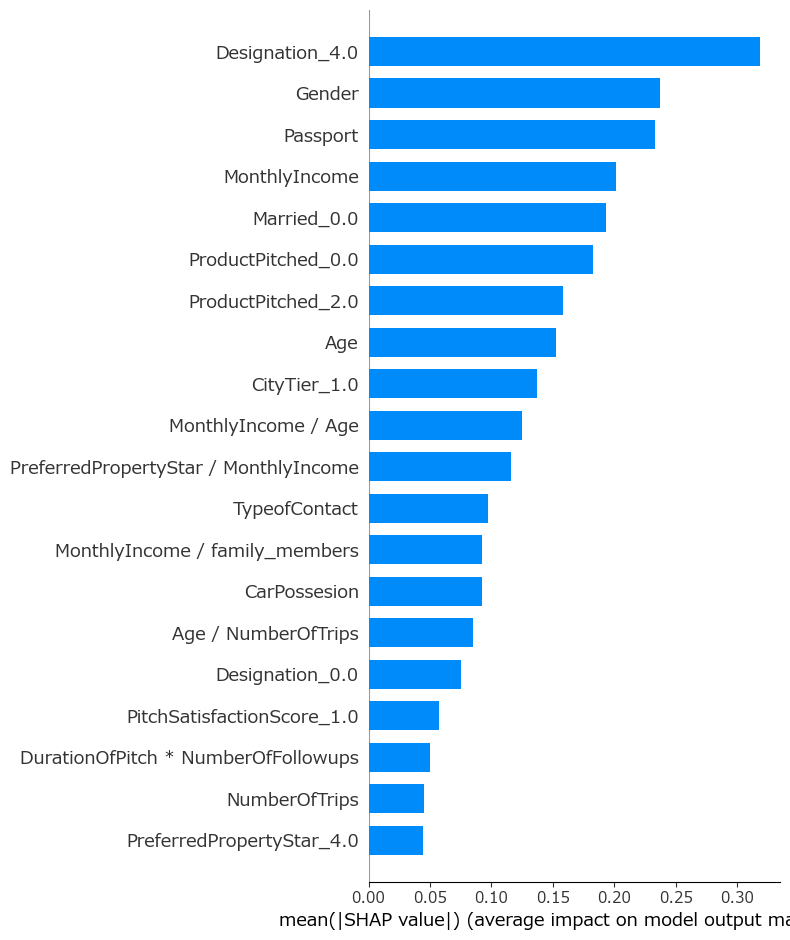

0.841344850628231


In [26]:
Train_x = train_x.copy()
Test_x = test_x.copy()


#LightGBM„ÅÆ„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøË®≠ÂÆö
params = {
    'objective': 'binary', 
    'metric': 'auc',
    'num_leaves': 23,
    'learning_rate': 0.05, 
    'feature_fraction': 0.4, 
    'bagging_fraction': 0.8,
    'bagging_freq': 3,
    'verbose': -1,
    'lambda_l1': 0.81,
    'lambda_l2': 90
}
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    train_set = lgb.Dataset(X_tr, y_tr)
    val_set = lgb.Dataset(X_val, y_val)
    
    model = lgb.train(params, train_set, num_boost_round = 500, early_stopping_rounds = 100, valid_sets = [train_set, val_set], verbose_eval = 100)
    
    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    pred = model.predict(Test_x)
    preds.append(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:4f}')
    auc_sum.append(auc)

# #ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÂá∫Âäõ„Åô„Çã
# importances = model.feature_importance()
# column_names = Train_x.columns.values
# temp = []
# for i in range(len(column_names)):
#     temp.append([importances[i],column_names[i]])
# temp.sort(reverse=True, key=lambda x:x[0])
# for i in range(len(temp)):
#     print(temp[i][0]," : ",temp[i][1])

# SHAP„ÅÆExplainer„Çí‰ΩúÊàê
explainer = shap.TreeExplainer(model)

# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åó„Å¶SHAPÂÄ§„ÇíË®àÁÆó
shap_values = explainer.shap_values(Test_x)

# Cohort Shapley„ÅÆÈáçË¶ÅÂ∫¶„ÇíË®àÁÆó
# SHAPÂÄ§„ÇíÁî®„ÅÑ„ÅüCohortÂà•„ÅÆÁâπÂæ¥ÈáèÈáçË¶ÅÂ∫¶„ÇíÁ¢∫Ë™çÔºà‰æã: „ÇØ„É©„Çπ„Åî„Å®„Å´ÈáçË¶ÅÂ∫¶„ÇíÂπ≥ÂùáÂåñÔºâ
cohort_shap_values = np.mean(np.abs(shap_values), axis=1)
cohort_importance = np.mean(cohort_shap_values, axis=0)

# ÁµêÊûú„ÇíË°®Á§∫
feature_importance = pd.DataFrame({
    'Feature': Test_x.columns,
    'Importance': cohort_importance
})

# ÈáçË¶ÅÂ∫¶È†Ü„Å´„ÇΩ„Éº„Éà„Åó„Å¶Ë°®Á§∫
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
# SHAP„ÅÆ„Éê„Éº „Éó„É≠„ÉÉ„Éà„ÇíÁî®„ÅÑ„ÅüÂèØË¶ñÂåñ
shap.summary_plot(shap_values, Test_x, plot_type="bar")
    
print(np.mean(auc_sum))

last_pred_1 = 3489 * [0.0]
for i in range(3489):
    for j in range(splits):
        last_pred_1[i] += preds[j][i]
    last_pred_1[i] /= splits


In [ ]:
0.8397382863609806
0.8412449552218257


In [27]:
#ÊèêÂá∫Áî®„Éï„Ç°„Ç§„É´„ÅÆ‰ΩúÊàê
submission = pd.DataFrame({'ID':test0['id'], 'ProdTaken':last_pred_1})
# submission.to_csv('YutaK9.csv', index=False, header=None)

In [ ]:
sorted_data = sorted(score_list, key=lambda x: x[1])
sorted_data

## ‚ë°LogisticRegression(„Ç¢„É≥„Çµ„É≥„Éñ„É´„Åß0ÂÄç„ÅåÊúÄÈÅ©„ÅÆ„Åü„ÇÅ‰∏çÊé°Áî®)

In [ ]:
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    model = LogisticRegression(penalty = 'none',
                               dual = False,
                               tol = 0.001,
                               C = 1.0,
                               fit_intercept = True,
                               intercept_scaling = 1,
                               class_weight = None,
                               random_state = None,
                               solver = 'saga',
                               max_iter = 100,
                               multi_class = 'auto',
                               verbose = 0,
                               warm_start = False,
                               n_jobs = None,
                               l1_ratio = None
                              )
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Çí„É¢„Éá„É´„Å´ÈÅ©Âêà„Åï„Åõ„Çã
    model.fit(X_tr, y_tr)
    
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Åã„Çâ‰∫àÊ∏¨ & auc„ÅÆÁÆóÂá∫
    y_pred_2d = model.predict_proba(X_val)
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = model.predict_proba(Test_x)
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_2 = 3489 * [0.0]
for i in range(3489):
    for j in range(splits):
        last_pred_2[i] += preds[j][i]
    last_pred_2[i] /= splits

## ‚ë¢SGDClassifier(„Ç¢„É≥„Çµ„É≥„Éñ„É´„Åß0ÂÄç„ÅåÊúÄÈÅ©„ÅÆ„Åü„ÇÅ‰∏çÊé°Áî®)

In [ ]:
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits=splits,shuffle=True,random_state=71)

for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val,y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    #„É≠„Ç∏„Çπ„ÉÜ„Ç£„ÉÉ„ÇØÂõûÂ∏∞„ÅÆ„Ç§„É≥„Çπ„Çø„É≥„Çπ„ÇíÁîüÊàê
    lr = SGDClassifier(penalty='elasticnet',
                       alpha = 0.003,
                       l1_ratio = 0.3,
                       tol=0.0001,
                       fit_intercept=True,
                       class_weight='balanced',
                       random_state=None,
                       max_iter=1000,
                       verbose=0,
                       warm_start=False,
                       n_jobs=None,
                       loss ='log_loss'
                       )
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Çí„É¢„Éá„É´„Å´ÈÅ©Âêà„Åï„Åõ„Çã
    lr.fit(X_tr,y_tr)
    
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Åã„Çâ‰∫àÊ∏¨ & auc„ÅÆÁÆóÂá∫
    y_pred_2d = lr.predict_proba(X_val)
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = lr.predict_proba(Test_x)
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_3 = 3489 * [0.0]
for i in range(3489):
    for j in range(splits):
        last_pred_3[i] += preds[j][i]
    last_pred_3[i] /= splits

## ‚ë£SVM(Âá¶ÁêÜ„Å´ÊôÇÈñì„Åå„Åã„Åã„Çä„Åô„Åé„Åü„Åü„ÇÅ‰∏çÊé°Áî®)

In [ ]:
'''
from sklearn.pipeline import Pipeline

auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    clf = svm.SVC(kernel = 'linear', probability = True)
    
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Çí„É¢„Éá„É´„Å´ÈÅ©Âêà„Åï„Åõ„Çã
    clf.fit(X_tr,y_tr)
    
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Åã„Çâ‰∫àÊ∏¨ & auc„ÅÆÁÆóÂá∫
    y_pred_2d = clf.predict(X_val, prediction_type='Probability')
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = clf.predict(Test_x, prediction_type='Probability')
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_4 = len(test_y) * [0.0]
for i in range(len(test_y)):
    for j in range(splits):
        last_pred_4[i] += preds[j][i]
    last_pred_4[i] /= splits


curve = roc_curve(test_y, last_pred_4)
plt.plot(curve[0], curve[1])
auc_test = roc_auc_score(test_y, last_pred_4)
print(auc_test)
'''

pass

## ‚ë§Ê±∫ÂÆöÊú®(‰ªñ„Å´ÊØî„Åπ„Å¶Êòé„Çâ„Åã„Å´„Çπ„Ç≥„Ç¢„Åå‰Ωé„ÅÑ„ÅÆ„Åß‰∏çÊé°Áî®)

In [ ]:
from sklearn import tree

auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    clf = tree.DecisionTreeClassifier(criterion = 'gini',
                                      splitter = 'best',
                                      max_depth = 4, 
                                      min_samples_split = 3,
                                      min_samples_leaf = 1,
                                      min_weight_fraction_leaf = 0.0,
                                      max_features = 4,
                                      random_state = None,
                                      max_leaf_nodes = 8,
                                      min_impurity_decrease = 1e-07,
                                      class_weight = 'balanced'
                                     )
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Çí„É¢„Éá„É´„Å´ÈÅ©Âêà„Åï„Åõ„Çã
    clf.fit(X_tr,y_tr)
    
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Åã„Çâ‰∫àÊ∏¨ & auc„ÅÆÁÆóÂá∫
    y_pred_2d = clf.predict_proba(X_val)
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = clf.predict_proba(Test_x)
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_5 = 3489 * [0.0]
for i in range(3489):
    for j in range(splits):
        last_pred_5[i] += preds[j][i]
    last_pred_5[i] /= splits

## ‚ë•„É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà

In [ ]:
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    clf = RandomForestClassifier(random_state = 53)
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Çí„É¢„Éá„É´„Å´ÈÅ©Âêà„Åï„Åõ„Çã
    clf.fit(X_tr,y_tr)
    
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Åã„Çâ‰∫àÊ∏¨ & auc„ÅÆÁÆóÂá∫
    y_pred_2d = clf.predict_proba(X_val)
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = clf.predict_proba(Test_x)
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_6 = 3489 * [0.0]
for i in range(3489):
    for j in range(splits):
        last_pred_6[i] += preds[j][i]
    last_pred_6[i] /= splits

# ensemble_preds.append(last_pred_6)

# ‚ë¶„Ç¢„ÉÄ„Éñ„Éº„Çπ„Éà

In [ ]:
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    clf = AdaBoostClassifier(random_state = 53)
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Çí„É¢„Éá„É´„Å´ÈÅ©Âêà„Åï„Åõ„Çã
    clf.fit(X_tr,y_tr)
    
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Åã„Çâ‰∫àÊ∏¨ & auc„ÅÆÁÆóÂá∫
    y_pred_2d = clf.predict_proba(X_val)
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = clf.predict_proba(Test_x)
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_7 = 3489 * [0.0]
for i in range(3489):
    for j in range(splits):
        last_pred_7[i] += preds[j][i]
    last_pred_7[i] /= splits

# ensemble_preds.append(last_pred_7)

## ‚ëßcatboost

In [29]:
auc_sum = []
preds = []
splits = 7
kf2 = KFold(n_splits = splits, shuffle = True, random_state = 74)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]
    
    train_pool = Pool(X_tr, label = y_tr)
    test_pool  = Pool(X_val,label = y_val)
    
    params = {
        'depth' : 6,
        'learning_rate' : 0.01,
        'early_stopping_rounds' : 10,
        'iterations' : 200,
        'custom_loss' : ['AUC'],
        'random_seed' : 42,   
    }

    clf = CatBoostClassifier(**params)
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Çí„É¢„Éá„É´„Å´ÈÅ©Âêà„Åï„Åõ„Çã
    clf.fit(train_pool, eval_set = test_pool)
    
    #Ë®ìÁ∑¥„Éá„Éº„Çø„Åã„Çâ‰∫àÊ∏¨ & auc„ÅÆÁÆóÂá∫
    y_pred_2d = clf.predict(X_val, prediction_type='Probability')
    y_pred = y_pred_2d[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    pred_2d = clf.predict(Test_x, prediction_type='Probability')
    pred = pred_2d[:,1]
    preds.append(pred)
    test_size = len(pred)
    
    print(f'Fold {fold + 1}: AUC = {auc:.4f}')
    auc_sum.append(auc)

print(np.mean(auc_sum))

last_pred_8 = 3489 * [0.0]
for i in range(3489):
    for j in range(splits):
        last_pred_8[i] += preds[j][i]
    last_pred_8[i] /= splits

# ensemble_preds.append(last_pred_8)

0:	learn: 0.6834476	test: 0.6835648	best: 0.6835648 (0)	total: 7.16ms	remaining: 1.42s
1:	learn: 0.6739974	test: 0.6743740	best: 0.6743740 (1)	total: 14ms	remaining: 1.38s
2:	learn: 0.6653657	test: 0.6661268	best: 0.6661268 (2)	total: 18.7ms	remaining: 1.23s
3:	learn: 0.6560359	test: 0.6571624	best: 0.6571624 (3)	total: 25.6ms	remaining: 1.25s
4:	learn: 0.6482849	test: 0.6498386	best: 0.6498386 (4)	total: 32.2ms	remaining: 1.26s
5:	learn: 0.6392817	test: 0.6411680	best: 0.6411680 (5)	total: 38.6ms	remaining: 1.25s
6:	learn: 0.6315649	test: 0.6337174	best: 0.6337174 (6)	total: 45.7ms	remaining: 1.26s
7:	learn: 0.6231705	test: 0.6257054	best: 0.6257054 (7)	total: 51.7ms	remaining: 1.24s
8:	learn: 0.6155364	test: 0.6183000	best: 0.6183000 (8)	total: 58.5ms	remaining: 1.24s
9:	learn: 0.6080858	test: 0.6111783	best: 0.6111783 (9)	total: 64.9ms	remaining: 1.23s
10:	learn: 0.6009794	test: 0.6042744	best: 0.6042744 (10)	total: 71.2ms	remaining: 1.22s
11:	learn: 0.5938052	test: 0.5975543	best: 

51:	learn: 0.2423378	test: 0.3089097	best: 0.3078114 (43)	total: 181ms	remaining: 514ms
52:	learn: 0.2411181	test: 0.3083113	best: 0.3078114 (43)	total: 184ms	remaining: 510ms
53:	learn: 0.2402023	test: 0.3086155	best: 0.3078114 (43)	total: 187ms	remaining: 506ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3078113955
bestIteration = 43

Shrink model to first 44 iterations.
Fold 6: AUC = 0.8351
0:	learn: 0.6082871	test: 0.6125604	best: 0.6125604 (0)	total: 4.22ms	remaining: 839ms
1:	learn: 0.5380912	test: 0.5494409	best: 0.5494409 (1)	total: 7.35ms	remaining: 727ms
2:	learn: 0.4803376	test: 0.4946426	best: 0.4946426 (2)	total: 11.5ms	remaining: 757ms
3:	learn: 0.4420630	test: 0.4611631	best: 0.4611631 (3)	total: 15.9ms	remaining: 777ms
4:	learn: 0.4058185	test: 0.4317290	best: 0.4317290 (4)	total: 19.5ms	remaining: 760ms
5:	learn: 0.3800543	test: 0.4109763	best: 0.4109763 (5)	total: 24ms	remaining: 776ms
6:	learn: 0.3663646	test: 0.3989706	best: 0.3989706 (6)	tot

# ÊúÄÁµÇ„Çπ„Ç≥„Ç¢„ÅÆÁÆóÂá∫

## „Ç¢„É≥„Çµ„É≥„Éñ„É´

In [ ]:
from itertools import product

def find_permutations(n):
    perm_list = []
    current_perm = [0] * n
    
    while True:
        if sum(current_perm) == 10:
            perm_list.append(tuple(current_perm))
    
        i = n-1
        while i >= 0 and current_perm[i] == 10:
            current_perm[i] = 0
            i -= 1
            
        if i < 0:
            break
        
        current_perm[i] += 1
    
    return perm_list

n = 4
permutations = find_permutations(n)
last_pred = len(test_y) * [0.0]
l = []
for i in range(n):
    l.append(0.0)
best_score = 0
for perm in permutations:
    for i in range(len(test_y)):
        last_pred_list = len(test_y) * l
        last_pred_list[i] = [last_pred_1[i], last_pred_6[i], last_pred_7[i], last_pred_8[i]]
        last_pred[i] = np.dot(last_pred_list[i], perm) / 10
    auc_test = roc_auc_score(test_y, last_pred)
    if auc_test > best_score:
        best_score = auc_test
        best_perm = perm
    print(perm, auc_test)
print('best param is ', best_perm, ', best score is ', best_score)

In [ ]:
def max_score(preds,dif,test_y,over_value_sum = [0.0], depth = [0],max = [0.0], ensemble_pred = [0.0],max_ratio = [0.0], now_ratio = [0.0]):
    
    if len(preds) == depth[0]+1: #ÊúÄÊ∑±ÈÉ®„Åß„ÅÆÂá¶ÁêÜ
        temp_ensemble_pred = len(preds[0])*[0.0]
        
        for i in range(len(preds[0])):
            temp_ensemble_pred[i] = ensemble_pred[i]
            
        value = 1.0 - over_value_sum[0]
        now_ratio[depth[0]] = value
        
        for i in range(len(preds[0])):
            ensemble_pred[i] += preds[depth[0]][i]*value
        ensemble_auc = roc_auc_score(test_y,ensemble_pred)
        
        for i in range(len(preds[0])):
            ensemble_pred[i] = temp_ensemble_pred[i]
            
        if ensemble_auc > max[0]:
            for i in range(len(now_ratio)):
                max_ratio[i] = now_ratio[i]
            max[0] = ensemble_auc
        
        
    elif depth[0] == 0:              #ÊúÄÊµÖÈÉ®„Åß„ÅÆÂá¶ÁêÜ
        ensemble_pred = len(preds[0])*[0.0] #ÊúÄÊ∑±ÈÉ®„ÅßAUC„ÇíË®àÁÆó„Åô„Çã„Åü„ÇÅ„ÅÆ„É™„Çπ„Éà
        max_ratio  = len(preds)*[0.0]       #AUC„ÅÆÊúÄÂ§ßÂÄ§„ÇíÊõ¥Êñ∞„Åó„ÅüÈöõ„Å´„ÄÅ„Åù„Çå„Çí‰∏é„Åà„Åü„Ç¢„É≥„Çµ„É≥„Éñ„É´Ââ≤Âêà„ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
        now_ratio  = len(preds)*[0.0]       #ÁèæÂú®„ÅÆ„Ç¢„É≥„Çµ„É≥„Éñ„É´Ââ≤Âêà„ÇíÊ†ºÁ¥ç„Åô„Çã„É™„Çπ„Éà
        while over_value_sum[0]<=1.0+dif:
                
            max_score(preds=preds,dif=dif,test_y=test_y,over_value_sum= over_value_sum,depth = [1], max = max, ensemble_pred = ensemble_pred, max_ratio = max_ratio, now_ratio = now_ratio)
            
            for i in range(len(preds[0])):
                ensemble_pred[i] += preds[depth[0]][i]*dif
                
            now_ratio[depth[0]] += dif
            over_value_sum[0] += dif
            
        return [max[0],max_ratio]
    else:  #„Åù„ÅÆ‰ªñ„ÅÆÊ∑±„Åï„Åß„ÅÆÂá¶ÁêÜ
        now_ratio[depth[0]] = 0.0
        temp_ratio = now_ratio
        temp_over_value_sum = over_value_sum[0]
        
        temp_ensemble_pred = len(preds[0])*[0.0]
        for i in range(len(preds[0])):
            temp_ensemble_pred[i] = ensemble_pred[i]
            
        while over_value_sum[0]<=1.0:
                
            max_score(preds=preds,dif=dif,test_y=test_y,over_value_sum = over_value_sum, depth = [depth[0]+1],max = max, ensemble_pred = ensemble_pred, max_ratio = max_ratio, now_ratio = now_ratio)
            
            for i in range(len(preds[0])):
                ensemble_pred[i] += preds[depth[0]][i]*dif
                
            now_ratio[depth[0]] += dif
            over_value_sum[0] += dif
        now_ratio = temp_ratio
        over_value_sum[0] = temp_over_value_sum
        
        for i in range(len(preds[0])):
            ensemble_pred[i] = temp_ensemble_pred[i]
            
        now_ratio[depth[0]] = 0.0
        
#„Ç¢„É≥„Çµ„É≥„Éñ„É´Âá¶ÁêÜ
dif = 0.05
result = max_score(preds = ensemble_preds, dif = dif, test_y = test_y)
print(result)

In [ ]:
Train_x = train_x[categorical_features]
Test_x = test_x[categorical_features]

#LightGBM„ÅÆ„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøË®≠ÂÆö
params = {
    'objective': 'binary', 
    'metric': 'auc',
    'num_leaves': 23,
    'learning_rate': 0.05, 
    'feature_fraction': 0.4, 
    'bagging_fraction': 0.8,
    'bagging_freq': 3,
    'verbose': -1,
    'lambda_l1': 0.81,
    'lambda_l2': 90
}
# auc_sum = []
preds = []
splits = 7
score_list = []
# for i in range(1, 62):
auc_sum = []
#     num_select = i * 10
    
#     rfe = RFE(estimator=GradientBoostingRegressor(random_state=0), n_features_to_select=num_select, step=0.5)
#     rfe.fit(train_x, train_y.to_numpy().ravel())
#     Train_x = pd.DataFrame(rfe.transform(train_x), columns=train_x.columns[rfe.support_])
#     rfe_column_list = Train_x.columns.tolist()
#     categorical_features_0 = list(set(categorical_features) & set(rfe_column_list))
#     Test_x = test_x[rfe_column_list]

kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]

    train_set = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_features)
    val_set = lgb.Dataset(X_val, y_val, categorical_feature=categorical_features)

    model = lgb.train(params, train_set, num_boost_round = 500, early_stopping_rounds = 100, valid_sets = [train_set, val_set], verbose_eval = 100)

    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    pred = model.predict(Test_x)
    preds.append(pred)

    print(f'Fold {fold + 1}: AUC = {auc:4f}')
    auc_sum.append(auc)

#ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÂá∫Âäõ„Åô„Çã
importances = model.feature_importance()
column_names = Train_x.columns.values
temp = []
for i in range(len(column_names)):
    temp.append([importances[i],column_names[i]])
temp.sort(reverse=True, key=lambda x:x[0])
for i in range(len(temp)):
    print(temp[i][0]," : ",temp[i][1])

#     score_list.append((num_select, np.mean(auc_sum)))
#     print((num_select, np.mean(auc_sum)))
# print(score_list)

print(np.mean(auc_sum))

last_pred_1 = 3489 * [0.0]
for i in range(3489):
    for j in range(splits):
        last_pred_1[i] += preds[j][i]
    last_pred_1[i] /= splits

# ensemble_preds = []
# ensemble_preds.append(last_pred_1)

In [ ]:
numeric_columns = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome', 'Offspring']
Train_x = train_x[numeric_columns]
Test_x = test_x[numeric_columns]

#LightGBM„ÅÆ„Éè„Ç§„Éë„Éº„Éë„É©„É°„Éº„ÇøË®≠ÂÆö
params = {
    'objective': 'binary', 
    'metric': 'auc',
    'num_leaves': 23,
    'learning_rate': 0.05, 
    'feature_fraction': 0.4, 
    'bagging_fraction': 0.8,
    'bagging_freq': 3,
    'verbose': -1,
    'lambda_l1': 0.81,
    'lambda_l2': 90
}
# auc_sum = []
preds = []
splits = 7
score_list = []
# for i in range(1, 62):
auc_sum = []
#     num_select = i * 10
    
#     rfe = RFE(estimator=GradientBoostingRegressor(random_state=0), n_features_to_select=num_select, step=0.5)
#     rfe.fit(train_x, train_y.to_numpy().ravel())
#     Train_x = pd.DataFrame(rfe.transform(train_x), columns=train_x.columns[rfe.support_])
#     rfe_column_list = Train_x.columns.tolist()
#     categorical_features_0 = list(set(categorical_features) & set(rfe_column_list))
#     Test_x = test_x[rfe_column_list]

kf2 = KFold(n_splits = splits, shuffle = True, random_state = 53)
for fold, (train_idx, valid_idx) in enumerate(kf2.split(Train_x)):
    X_tr, y_tr = Train_x.iloc[train_idx, :], train_y.iloc[train_idx]
    X_val, y_val = Train_x.iloc[valid_idx, :], train_y.iloc[valid_idx]

    train_set = lgb.Dataset(X_tr, y_tr)
    val_set = lgb.Dataset(X_val, y_val)

    model = lgb.train(params, train_set, num_boost_round = 500, early_stopping_rounds = 100, valid_sets = [train_set, val_set], verbose_eval = 100)

    y_pred = model.predict(X_val)
    auc = roc_auc_score(y_val, y_pred)
    pred = model.predict(Test_x)
    preds.append(pred)

    print(f'Fold {fold + 1}: AUC = {auc:4f}')
    auc_sum.append(auc)

#ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÂá∫Âäõ„Åô„Çã
importances = model.feature_importance()
column_names = Train_x.columns.values
temp = []
for i in range(len(column_names)):
    temp.append([importances[i],column_names[i]])
temp.sort(reverse=True, key=lambda x:x[0])
for i in range(len(temp)):
    print(temp[i][0]," : ",temp[i][1])

#     score_list.append((num_select, np.mean(auc_sum)))
#     print((num_select, np.mean(auc_sum)))
# print(score_list)

print(np.mean(auc_sum))

last_pred_2 = 3489 * [0.0]
for i in range(3489):
    for j in range(splits):
        last_pred_2[i] += preds[j][i]
    last_pred_2[i] /= splits

# ensemble_preds = []
# ensemble_preds.append(last_pred_1)

In [ ]:
#ÊèêÂá∫Áî®„Éï„Ç°„Ç§„É´„ÅÆ‰ΩúÊàê
last_pred = 3489 * [0.0]
for i in range(3489):
    last_pred[i] = 0.5*last_pred_1[i] + 0.5*last_pred_2[i]
submission = pd.DataFrame({'ID':test0['id'], 'ProdTaken':last_pred})
# submission.to_csv('YutaK8.csv', index=False, header=None)